# Modelling using SVM

In [11]:
import pandas as pd

df = pd.read_csv('../data/preprocessed/review_tiktok_dataset_sentiment_indobertweet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   at                100000 non-null  object 
 1   reviewId          100000 non-null  object 
 2   userName          100000 non-null  object 
 3   score             100000 non-null  int64  
 4   content           100000 non-null  object 
 5   cleaning          100000 non-null  object 
 6   case_folding      100000 non-null  object 
 7   no_elongation     100000 non-null  object 
 8   formalization     99773 non-null   object 
 9   tokenized         100000 non-null  object 
 10  stopword_removal  100000 non-null  object 
 11  stemming          100000 non-null  object 
 12  sentiment         100000 non-null  object 
 13  confident_score   100000 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 10.7+ MB


In [12]:
df_filtered = df[df['confident_score'] >= 0.9]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78304 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   at                78304 non-null  object 
 1   reviewId          78304 non-null  object 
 2   userName          78304 non-null  object 
 3   score             78304 non-null  int64  
 4   content           78304 non-null  object 
 5   cleaning          78304 non-null  object 
 6   case_folding      78304 non-null  object 
 7   no_elongation     78304 non-null  object 
 8   formalization     78295 non-null  object 
 9   tokenized         78304 non-null  object 
 10  stopword_removal  78304 non-null  object 
 11  stemming          78304 non-null  object 
 12  sentiment         78304 non-null  object 
 13  confident_score   78304 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 9.0+ MB


In [13]:
df_filtered.isna().sum()

at                  0
reviewId            0
userName            0
score               0
content             0
cleaning            0
case_folding        0
no_elongation       0
formalization       9
tokenized           0
stopword_removal    0
stemming            0
sentiment           0
confident_score     0
dtype: int64

In [14]:
df_filtered = df_filtered.dropna(subset=['formalization']).reset_index(drop=True)

In [15]:
df_filtered.isna().sum()

at                  0
reviewId            0
userName            0
score               0
content             0
cleaning            0
case_folding        0
no_elongation       0
formalization       0
tokenized           0
stopword_removal    0
stemming            0
sentiment           0
confident_score     0
dtype: int64

## Sentimnet Distribution

In [16]:
df_filtered['sentiment'].value_counts()

sentiment
Negative    58747
Positive    10881
Neutral      8667
Name: count, dtype: int64

## Data Split

In [17]:
from sklearn.model_selection import train_test_split

X = df_filtered['stemming']
y = df_filtered['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})


## Resampling

In [18]:
from sklearn.utils import resample

# Pisahkan tiap kelas
df_negative = train_df[train_df['label'] == 'Negative'].sample(n=10000, random_state=42)

df_positive = resample(
    train_df[train_df['label'] == 'Positive'],
    replace=True,
    n_samples=10000,  
    random_state=42
)

df_neutral = resample(
    train_df[train_df['label'] == 'Neutral'],
    replace=True,
    n_samples=10000,
    random_state=42
)

# Gabungkan dan acak
train_balanced = pd.concat([df_negative, df_positive, df_neutral]).sample(frac=1, random_state=42).reset_index(drop=True)


In [19]:
train_balanced['label'].value_counts()

label
Negative    10000
Neutral     10000
Positive    10000
Name: count, dtype: int64

## TF-IDF Vectorization & Modelling


📌 Evaluating max_features=60000 ...
Accuracy       : 0.9142
F1-Macro       : 0.8407
F1-Weighted    : 0.9166

Classification Report:
              precision    recall  f1-score
Negative       0.973605  0.941867  0.957474
Neutral        0.639837  0.724337  0.679470
Positive       0.855794  0.916360  0.885042
accuracy       0.914235  0.914235  0.914235
macro avg      0.823079  0.860855  0.840662
weighted avg   0.920274  0.914235  0.916624


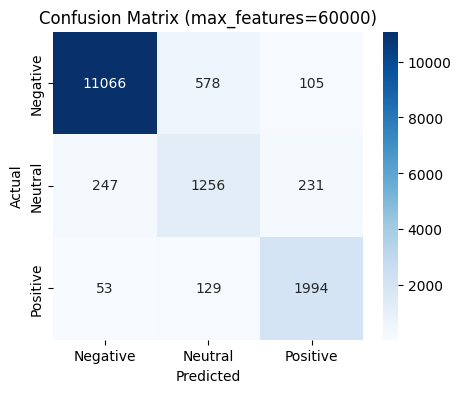


📌 Evaluating max_features=70000 ...
Accuracy       : 0.9146
F1-Macro       : 0.8407
F1-Weighted    : 0.9168

Classification Report:
              precision    recall  f1-score
Negative       0.972949  0.942889  0.957683
Neutral        0.643998  0.720877  0.680272
Positive       0.854631  0.915901  0.884206
accuracy       0.914554  0.914554  0.914554
macro avg      0.823859  0.859889  0.840720
weighted avg   0.920081  0.914554  0.916754


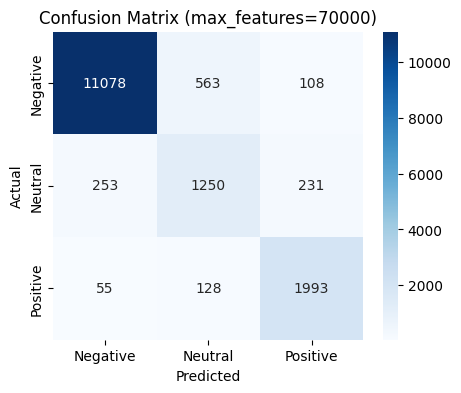


📌 Evaluating max_features=80000 ...
Accuracy       : 0.9151
F1-Macro       : 0.8413
F1-Weighted    : 0.9172

Classification Report:
              precision    recall  f1-score
Negative       0.972888  0.943740  0.958092
Neutral        0.646632  0.719723  0.681223
Positive       0.855060  0.916360  0.884650
accuracy       0.915129  0.915129  0.915129
macro avg      0.824860  0.859941  0.841321
weighted avg   0.920386  0.915129  0.917227


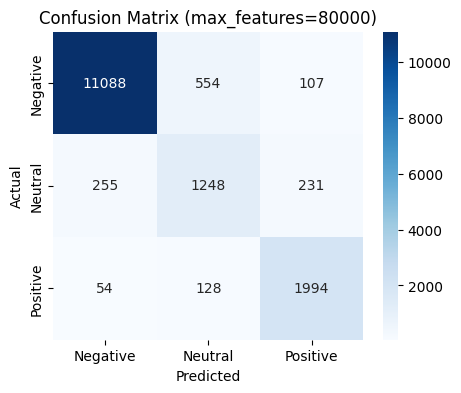


📌 Evaluating max_features=90000 ...
Accuracy       : 0.9149
F1-Macro       : 0.8408
F1-Weighted    : 0.9169

Classification Report:
              precision    recall  f1-score
Negative       0.972208  0.943825  0.957806
Neutral        0.647366  0.715686  0.679814
Positive       0.854452  0.917279  0.884752
accuracy       0.914873  0.914873  0.914873
macro avg      0.824675  0.858930  0.840791
weighted avg   0.919873  0.914873  0.916871


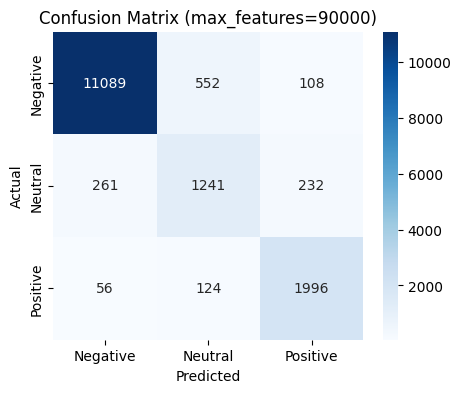


📌 Evaluating max_features=100000 ...
Accuracy       : 0.9143
F1-Macro       : 0.8398
F1-Weighted    : 0.9163

Classification Report:
              precision    recall  f1-score
Negative       0.971859  0.943570  0.957506
Neutral        0.646322  0.714533  0.678718
Positive       0.853105  0.915441  0.883174
accuracy       0.914298  0.914298  0.914298
macro avg      0.823762  0.857848  0.839799
weighted avg   0.919309  0.914298  0.916305


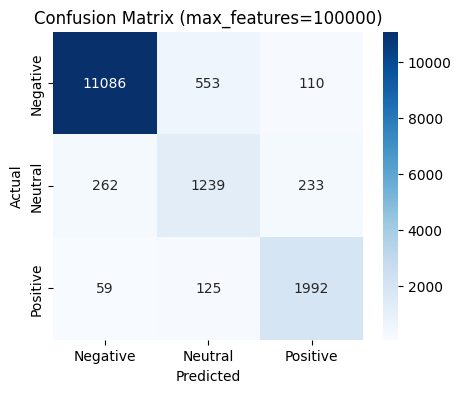

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

max_features_list = [60000, 70000, 80000, 90000, 100000]
results = []

for mf in max_features_list:
    print(f"\n📌 Evaluating max_features={mf} ...")
    
    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=mf, ngram_range=(1, 2))
    X_train_vec = vectorizer.fit_transform(train_balanced['text'])
    X_test_vec = vectorizer.transform(test_df['text'])

    # SVM model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_vec, train_balanced['label'])

    # Predict
    y_pred = model.predict(X_test_vec)
    y_true = test_df['label']

    # Evaluation Metrics
    acc = accuracy_score(y_true, y_pred)
    report_dict = classification_report(y_true, y_pred, output_dict=True, digits=4)
    cm = confusion_matrix(y_true, y_pred, labels=["Negative", "Neutral", "Positive"])

    # Save results
    results.append({
        'max_features': mf,
        'accuracy': acc,
        'f1_macro': report_dict['macro avg']['f1-score'],
        'report': report_dict,
        'confusion_matrix': cm
    })

    # Print Report
    print(f"Accuracy       : {acc:.4f}")
    print(f"F1-Macro       : {report_dict['macro avg']['f1-score']:.4f}")
    print(f"F1-Weighted    : {report_dict['weighted avg']['f1-score']:.4f}")
    print("\nClassification Report:")
    print(pd.DataFrame(report_dict).transpose()[['precision', 'recall', 'f1-score']])

    # Confusion Matrix (visual)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f'Confusion Matrix (max_features={mf})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
